# Graphistry <> graphviz integration quickstart

The [graphviz engine](https://graphviz.org/) is popular for layout of small graphs and rendering to static images. The Graphistry Python bindings to graphviz enable using pygraphistry as usual for quickly loading and manipulating your data, and then benefiting from graphviz for layout, and optionally, rendering.

The example below shows laying out and rendering company ownership data that is in a tree and benefits from graphviz's high-quality layout engine.

## Setup

* graphviz: Install the graphviz engine and the pygraphviz bindings, see below (official [tutorial](https://pygraphviz.github.io/documentation/stable/install.html) )
* Graphistry: Install PyGraphistry below, and [get a free GPU account on Graphistry Hub](https://www.graphistry.com/get-started) or run your own server

Notes:

* You must install the graphviz engine, as well as its pygraphviz Python bindings and pygraphistry
* graphviz is most known for its `"dot"` layout engine, and it includes others as well
* graphviz is generally not recommended for layout of graphs over 10,000 nodes and edges

In [20]:
#!apt-get install graphviz graphviz-dev

#!pip install -q graphistry[pygraphviz]

  Preparing metadata (setup.py) ... done


## Imports

In [102]:
from typing import Any, Dict, Literal, Optional
import logging
try:
  import pygraphviz as pgv
except (ImportError, ModuleNotFoundError):
  logging.error("ImportError: Did you install pygraphviz and the supporting native packages?")
  raise

import pandas as pd
import graphistry
from graphistry import Plottable
graphistry.register(api=3, username=FILL_ME_IN, password=FILL_ME_IN)

graphistry.__version__

'0.34.5+12.g4dba3e6'

### Sample graph: HSBC Beneficial ownership graph

Sample data from [openownership.org](https://openownership.org/). Corporate ownership graphs often have deeply tree structure, and for bigger conglomerates with numerous subsidaries, officers, board officers, suppliers, and lenders, can greatly benefit from higher-quality tree layouts.

In [2]:
companies_df = pd.DataFrame([{'label': 'Hsbc Finance (Netherlands)', 'n': '1862294673469042014'},
 {'label': 'Hsbc Holdings Plc', 'n': '7622088245850069747'},
 {'label': 'Unknown person(s)', 'n': '7622088245850069747-unknown'},
 {'label': 'HSBC PROPERTY (UK) LIMITED', 'n': '16634236373777089526'},
 {'label': 'HSBC ALTERNATIVE INVESTMENTS LIMITED',
  'n': '18011320449780894329'},
 {'label': 'HSBC INVESTMENT COMPANY LIMITED', 'n': '9134577322728469115'},
 {'label': 'HSBC IM PENSION TRUST LIMITED', 'n': '1446072728533515665'},
 {'label': 'MERCANTILE COMPANY LIMITED', 'n': '6904185395252167658'},
 {'label': 'Mp Payments Group Limited', 'n': '13630126251685975826'},
 {'label': 'MP PAYMENTS OPERATIONS LIMITED', 'n': '11514603667851101425'},
 {'label': 'MP PAYMENTS UK LIMITED', 'n': '13417892994160273884'},
 {'label': 'Hsbc Asia Pacific Holdings (Uk) Limited',
  'n': '2173486047275631423'},
 {'label': 'HSBC SECURITIES (JAPAN) LIMITED', 'n': '18045747820524565803'}])

ownership_df = pd.DataFrame([{'s': '7622088245850069747', 'd': '1862294673469042014'},
 {'s': '7622088245850069747-unknown', 'd': '7622088245850069747'},
 {'s': '1862294673469042014', 'd': '16634236373777089526'},
 {'s': '1862294673469042014', 'd': '18011320449780894329'},
 {'s': '1862294673469042014', 'd': '9134577322728469115'},
 {'s': '9134577322728469115', 'd': '1446072728533515665'},
 {'s': '9134577322728469115', 'd': '6904185395252167658'},
 {'s': '9134577322728469115', 'd': '13630126251685975826'},
 {'s': '13630126251685975826', 'd': '11514603667851101425'},
 {'s': '13630126251685975826', 'd': '13417892994160273884'},
 {'s': '9134577322728469115', 'd': '2173486047275631423'},
 {'s': '2173486047275631423', 'd': '18045747820524565803'},
 {'s': '9134577322728469115', 'd': '16634236373777089526'}])

In [19]:
g = graphistry.edges(ownership_df, 's', 'd').nodes(companies_df, 'n').bind(point_title='label')

In [33]:
g = g.nodes(g._nodes.assign(sz=1)).encode_point_size('sz')

## Minimal tree layout and graphviz layout engines

Graphviz provides 15+ layout engines you can use. General guidance is to use for graphs up to 10,000 nodes and engines.

The `"dot"` layout engine is best known due to its beautiful hierarchical layouts for directed acycle graphs like trees.

In [35]:
g2 = g.layout_graphviz('dot')
g2.plot()

In [ ]:
# Static render via Graphviz (auto-displays in notebook, returns bytes)
# Falls back to layout if no x/y
g.plot_static(format='svg')


Additional layout engines beyond `"dot"` are below. See also the [graphviz layout engines documents](https://graphviz.org/docs/layouts/). The same documentation, and the below section on global graph attributes, describe options you can pass in to different layout engines.

In [6]:
from graphistry.plugins_types.graphviz_types import PROGS
PROGS

['acyclic',
 'ccomps',
 'circo',
 'dot',
 'fdp',
 'gc',
 'gvcolor',
 'gvpr',
 'neato',
 'nop',
 'osage',
 'patchwork',
 'sccmap',
 'sfdp',
 'tred',
 'twopi',
 'unflatten']

In [36]:
g2b = g.layout_graphviz('neato')
g2b.plot()

In [ ]:
from graphistry.plugins_types.graphviz_types import PROGS

### Global attributes

You can set global attributes. Parameter [`graph_attr`](https://graphviz.org/docs/graph/) generally refers to layout engine options, while [`edge_attr`](https://graphviz.org/docs/edges/) and [`node_attr`](https://graphviz.org/docs/nodes/) are generally for default colors, sizes, shapes, etc.

In [39]:
g2b = g.layout_graphviz(
    'dot',
    graph_attr={'ratio': 10},
    edge_attr={},
    node_attr={}
)
g2b.plot()

In [1]:

from graphistry.plugins_types.graphviz_types import GRAPH_ATTRS
GRAPH_ATTRS

['_background',
 'bb',
 'beautify',
 'bgcolor',
 'center',
 'charset',
 'class',
 'clusterrank',
 'colorscheme',
 'comment',
 'compound',
 'concentrate',
 'Damping',
 'defaultdist',
 'dim',
 'dimen',
 'diredgeconstraints',
 'dpi',
 'epsilon',
 'esep',
 'fontcolor',
 'fontname',
 'fontnames',
 'fontpath',
 'fontsize',
 'forcelabels',
 'gradientangle',
 'href',
 'id',
 'imagepath',
 'inputscale',
 'K',
 'label',
 'label_scheme',
 'labeljust',
 'labelloc',
 'landscape',
 'layerlistsep',
 'layers',
 'layerselect',
 'layersep',
 'layout',
 'levels',
 'levelsgap',
 'lheight',
 'linelength',
 'lp',
 'lwidth',
 'margin',
 'maxiter',
 'mclimit',
 'mindist',
 'mode',
 'model',
 'newrank',
 'nodesep',
 'nojustify',
 'normalize',
 'notranslate',
 'nslimit',
 'nslimit1',
 'oneblock',
 'ordering',
 'orientation',
 'outputorder',
 'overlap',
 'overlap_scaling',
 'overlap_shrink',
 'pack',
 'packmode',
 'pad',
 'page',
 'pagedir',
 'quadtree',
 'quantum',
 'rankdir',
 'ranksep',
 'ratio',
 'remincross

In [2]:

from graphistry.plugins_types.graphviz_types import EDGE_ATTRS
EDGE_ATTRS

['arrowhead',
 'arrowsize',
 'arrowtail',
 'class',
 'color',
 'colorscheme',
 'comment',
 'constraint',
 'decorate',
 'dir',
 'edgehref',
 'edgetarget',
 'edgetooltip',
 'edgeURL',
 'fillcolor',
 'fontcolor',
 'fontname',
 'fontsize',
 'head_lp',
 'headclip',
 'headhref',
 'headlabel',
 'headport',
 'headtarget',
 'headtooltip',
 'headURL',
 'href',
 'id',
 'label',
 'labelangle',
 'labeldistance',
 'labelfloat',
 'labelfontcolor',
 'labelfontname',
 'labelfontsize',
 'labelhref',
 'labeltarget',
 'labeltooltip',
 'labelURL',
 'layer',
 'len',
 'lhead',
 'lp',
 'ltail',
 'minlen',
 'nojustify',
 'penwidth',
 'pos',
 'samehead',
 'sametail',
 'showboxes',
 'style',
 'tail_lp',
 'tailclip',
 'tailhref',
 'taillabel',
 'tailport',
 'tailtarget',
 'tailtooltip',
 'tailURL',
 'target',
 'tooltip',
 'URL',
 'weight',
 'xlabel',
 'xlp']

In [3]:

from graphistry.plugins_types.graphviz_types import NODE_ATTRS
NODE_ATTRS

['area',
 'class',
 'color',
 'colorscheme',
 'comment',
 'distortion',
 'fillcolor',
 'fixedsize',
 'fontcolor',
 'fontname',
 'fontsize',
 'gradientangle',
 'group',
 'height',
 'href',
 'id',
 'image',
 'imagepos',
 'imagescale',
 'label',
 'labelloc',
 'layer',
 'margin',
 'nojustify',
 'ordering',
 'orientation',
 'penwidth',
 'peripheries',
 'pin',
 'pos',
 'rects',
 'regular',
 'root',
 'samplepoints',
 'shape',
 'shapefile',
 'showboxes',
 'sides',
 'skew',
 'sortv',
 'style',
 'target',
 'tooltip',
 'URL',
 'vertices',
 'width',
 'xlabel',
 'xlp',
 'z']

## Static image rendering and entity-level attributes

graphviz suports rendering to a static file in various image formats such as png.

You can add graphviz-specific columns to your node and edge dataframes that configure per-row render settings. These use the same names as in the above global attribute guidance, such as `color`, `shape`, and `label`.

Adding a column for an attribute will typically disable the global attribute. For example, creating setting node column `"shape"`  with values `"star"` and `None`, and global node attribute `"shape"` with value value `"box"`. All the nodes with `shape == "star"` will render as a star in the static image, and the rows with value `None` will not default to the global node attribute `"box"`, but to graphviz's general default of an oval.

In [76]:
g._nodes.apply(lambda row: row['n'], axis=1)

,0
0,1862294673469042014
1,7622088245850069747
2,7622088245850069747-unknown
3,16634236373777089526
4,18011320449780894329
5,9134577322728469115
6,1446072728533515665
7,6904185395252167658
8,13630126251685975826
9,11514603667851101425


In [68]:
g._nodes.apply(lambda row: print('row', row['n']), 1)

row 1862294673469042014
row 7622088245850069747
row 7622088245850069747-unknown
row 16634236373777089526
row 18011320449780894329
row 9134577322728469115
row 1446072728533515665
row 6904185395252167658
row 13630126251685975826
row 11514603667851101425
row 13417892994160273884
row 2173486047275631423
row 18045747820524565803


,0
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


In [99]:
# row-level attrs

root_id = '7622088245850069747-unknown'

g2c = g.nodes(g._nodes.assign(
    label=g._nodes.apply(lambda row: "ROOT: Unknown person(s)" if row['n'] == root_id else row['label'], axis=1),
    shape=g._nodes.n.apply(lambda n: "box" if n == root_id else None),
    color=g._nodes.n.apply(lambda n: "blue" if n == root_id else 'red')
)).edges(g._edges.assign(
    color=g._edges[g._source].apply(lambda n: 'blue' if n == root_id else None)
))


# Save a static graphviz render
g2c_positioned = g2c.layout_graphviz(
    "dot",
    render_to_disk=True,
    path=f'./graph.png',
    graph_attr={},
    edge_attr={},
    node_attr={'color': 'green'},  # ignored due to g2c._nodes.color
    format='png'
)

g2c_positioned._nodes.head()

,n,x,y,label,sz,shape,color
0,1862294673469042014,381.39,234.0,Hsbc Finance (Netherlands),1,None,red
1,16634236373777089526,140.39,90.0,HSBC PROPERTY (UK) LIMITED,1,None,red
2,18011320449780894329,381.39,162.0,HSBC ALTERNATIVE INVESTMENTS LIMITED,1,None,red
3,9134577322728469115,778.39,162.0,HSBC INVESTMENT COMPANY LIMITED,1,None,red
4,1446072728533515665,454.39,90.0,HSBC IM PENSION TRUST LIMITED,1,None,red


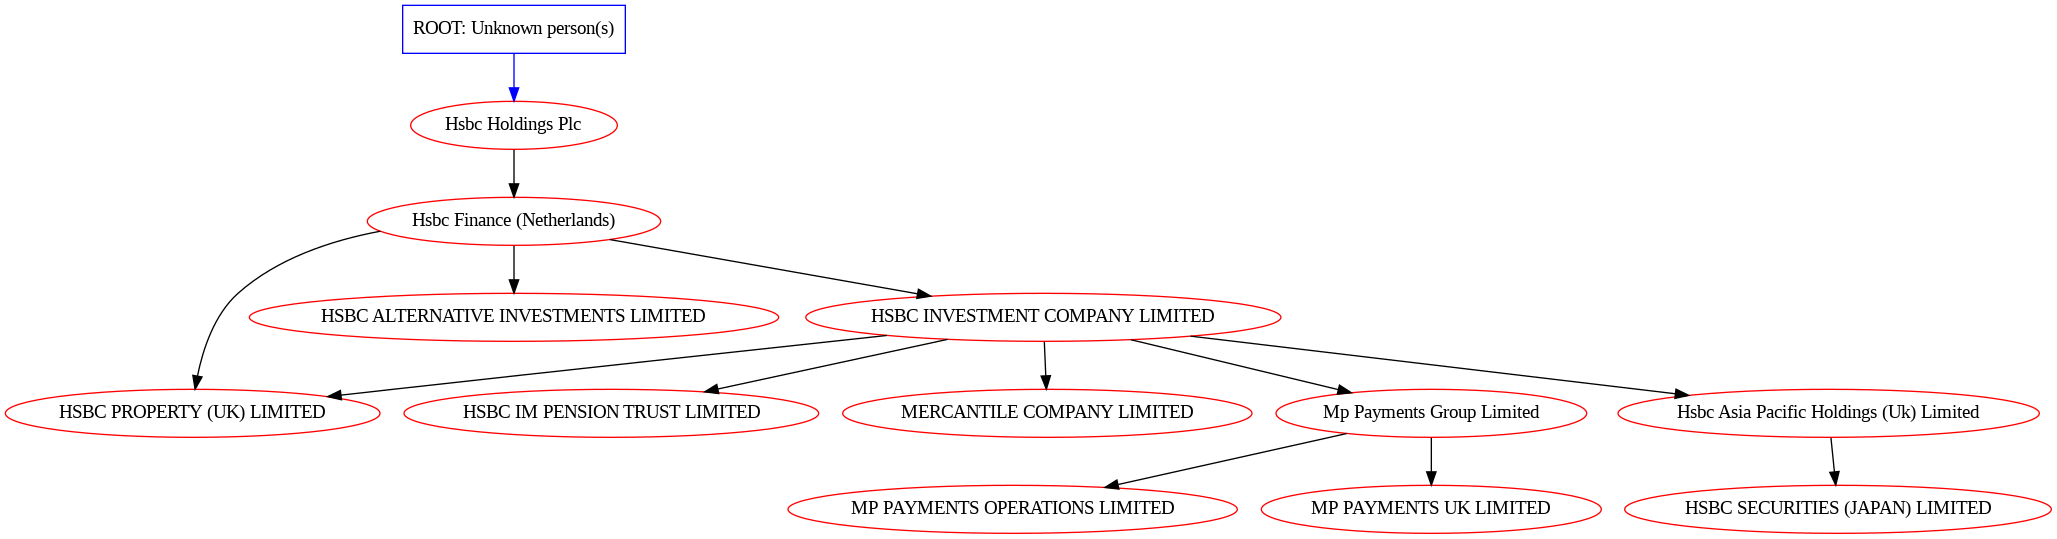

In [98]:
from IPython.display import Image
Image(filename='./graph.png')

In [101]:
g2d = g.layout_graphviz('circo')
g2d.plot()